# Table of Contents

1. [Imports](#Imports)<br>
2. [Data Import](#DataImport)<br>
3. [Financial Indicators](#FinancialIndicators)<br>
    3.1 [Simple Moving Average](#SimpleMovingAverage)<br>
    3.2 [Moving Average Convergence Divergence](#MovingAverageConvergenceDivergence)<br>
    3.3 [Stochastic Oscillator](#StochasticOscillator)<br>
    3.4 [Accumulation/Distribution Line](#Accumulation/DistributionLine)<br>
    3.5 [Bollinger Bands](#BollingerBands)<br>
    3.6 [On Balance Volume](#OnBalanceVolume)<br>

## Imports <a class="anchor" id="Imports"></a>

In [1]:
# pip install yfinance

In [2]:
from scipy import stats
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
from datetime import datetime
plt.style.use('fivethirtyeight')
import operator

## Data Import <a class="anchor" id="DataImport"></a>

In [3]:
import numpy as np
import statsmodels.api as sm
from datetime import datetime
from dateutil.relativedelta import relativedelta
ticker='ADBE'
start = datetime(2018,1,1)
end = datetime(2021,1,1)
df = DataReader(ticker,  'yahoo', start, end)

In [4]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,177.800003,175.259995,175.850006,177.699997,2432800,177.699997
2018-01-03,181.889999,177.699997,178.000000,181.039993,2561200,181.039993
2018-01-04,184.059998,181.639999,181.929993,183.220001,2211400,183.220001
2018-01-05,185.899994,183.539993,185.000000,185.339996,2376500,185.339996
2018-01-08,185.600006,183.830002,184.949997,185.039993,2088000,185.039993
...,...,...,...,...,...,...
2020-12-24,503.010010,497.279999,499.160004,499.859985,589200,499.859985
2020-12-28,506.040009,496.820007,505.609985,498.950012,1515400,498.950012
2020-12-29,505.350006,499.739990,501.170013,502.109985,1434100,502.109985


## Financial Indicators <a class="anchor" id="FinancialIndicators"></a>

### Simple Moving Average <a class="anchor" id="SimpleMovingAverage"></a>

The Exponential Moving Average is a staple of technical analysis and is used in countless technical indicators. In a Simple Moving Average, each value in the time period carries equal weight, and values outside of the time period are not included in the average. However, the Exponential Moving Average is a cumulative calculation, including all data. Past values have a diminishing contribution to the average, while more recent values have a greater contribution. This method allows the moving average to be more responsive to changes in the data.

In [5]:
def SMA(df , periods=20):
    df["SMA"] = df ["Adj Close"].rolling(window=periods).mean()
    return df

In [6]:
SMA(df)

,High,Low,Open,Close,Volume,Adj Close,SMA
Date,,,,,,,
2018-01-02,177.800003,175.259995,175.850006,177.699997,2432800,177.699997,NaN
2018-01-03,181.889999,177.699997,178.000000,181.039993,2561200,181.039993,NaN
2018-01-04,184.059998,181.639999,181.929993,183.220001,2211400,183.220001,NaN
2018-01-05,185.899994,183.539993,185.000000,185.339996,2376500,185.339996,NaN
2018-01-08,185.600006,183.830002,184.949997,185.039993,2088000,185.039993,NaN
...,...,...,...,...,...,...,...
2020-12-24,503.010010,497.279999,499.160004,499.859985,589200,499.859985,488.342001
2020-12-28,506.040009,496.820007,505.609985,498.950012,1515400,498.950012,489.438002
2020-12-29,505.350006,499.739990,501.170013,502.109985,1434100,502.109985,490.620001


### Moving Average Convergence Divergence <a class="anchor" id="MovingAverageConvergenceDivergence"></a>

he Moving Average Convergence Divergence (MACD) is the difference between two Exponential Moving Averages. The Signal line is an Exponential Moving Average of the MACD.
The MACD signals trend changes and indicates the start of the new trend direction. High values indicate overbought conditions, low values indicate oversold conditions. Divergence with the price indicates an end to the current trend, especially if the MACD is at extremely high or low values. When the MACD line crosses above the signal line a buy signal is generated. When the MACD crosses below the signal line, a sell signal is generated. To confirm the signal, the MACD should be above zero for a buy, and below zero for a sell.

In [7]:
def MACD(df):
    exp1 = df["Adj Close"].ewm(span=12, adjust=False).mean()
    exp2 = df["Adj Close"].ewm(span=26, adjust=False).mean()
    macd = exp1 - exp2
    df["MACD"] = macd
#     exp3 = macd.ewm(span=9, adjust=False).mean()
    
    return df

In [8]:
MACD(df)

,High,Low,Open,Close,Volume,Adj Close,SMA,MACD
Date,,,,,,,,
2018-01-02,177.800003,175.259995,175.850006,177.699997,2432800,177.699997,NaN,0.000000
2018-01-03,181.889999,177.699997,178.000000,181.039993,2561200,181.039993,NaN,0.266438
2018-01-04,184.059998,181.639999,181.929993,183.220001,2211400,183.220001,NaN,0.646054
2018-01-05,185.899994,183.539993,185.000000,185.339996,2376500,185.339996,NaN,1.105228
2018-01-08,185.600006,183.830002,184.949997,185.039993,2088000,185.039993,NaN,1.428452
...,...,...,...,...,...,...,...,...
2020-12-24,503.010010,497.279999,499.160004,499.859985,589200,499.859985,488.342001,6.569721
2020-12-28,506.040009,496.820007,505.609985,498.950012,1515400,498.950012,489.438002,6.523646
2020-12-29,505.350006,499.739990,501.170013,502.109985,1434100,502.109985,490.620001,6.665282


### Stochastic Oscillator <a class="anchor" id="StochasticOscillator"></a>

The Stochastic Oscillator measures where the close is in relation to the recent trading range. The values range from zero to 100. %D values over 75 indicate an overbought condition; values under 25 indicate an oversold condition. When the Fast %D crosses above the Slow %D, it is a buy signal; when it crosses below, it is a sell signal. The Raw %K is generally considered too erratic to use for crossover signals.

In [9]:
def calculate_k(df):
    adj_close = df["Adj Close"]
    highest_hi = df['High'].rolling(window=10).max()
    lower_lo = df["Low"].rolling(window=10).min()
    df['per_k_stoch_10'] = (adj_close - lower_lo)/(highest_hi - lower_lo)*100
    return df

def calculate_d(df):
    df['per_d_stoch_10'] = df['per_k_stoch_10'].rolling(window=10).mean()
    return df

def stochastic_oscillator(df):
    df = calculate_k(df)
    df = calculate_d(df)
    return df

In [10]:
stochastic_oscillator(df)

,High,Low,Open,Close,Volume,Adj Close,SMA,MACD,per_k_stoch_10,per_d_stoch_10
Date,,,,,,,,,,
2018-01-02,177.800003,175.259995,175.850006,177.699997,2432800,177.699997,NaN,0.000000,NaN,NaN
2018-01-03,181.889999,177.699997,178.000000,181.039993,2561200,181.039993,NaN,0.266438,NaN,NaN
2018-01-04,184.059998,181.639999,181.929993,183.220001,2211400,183.220001,NaN,0.646054,NaN,NaN
2018-01-05,185.899994,183.539993,185.000000,185.339996,2376500,185.339996,NaN,1.105228,NaN,NaN
2018-01-08,185.600006,183.830002,184.949997,185.039993,2088000,185.039993,NaN,1.428452,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,503.010010,497.279999,499.160004,499.859985,589200,499.859985,488.342001,6.569721,81.469746,71.135955
2020-12-28,506.040009,496.820007,505.609985,498.950012,1515400,498.950012,489.438002,6.523646,74.633998,76.272477
2020-12-29,505.350006,499.739990,501.170013,502.109985,1434100,502.109985,490.620001,6.665282,81.773303,78.673633


### Accumulation/Distribution Line <a class="anchor" id="Accumulation/DistributionLine"></a> 

The Accumulation/Distribution Line is similar to the On Balance Volume (OBV), which sums the volume times +1/-1 based on whether the close is higher than the previous close. The Accumulation/Distribution indicator, however, multiplies the volume by the close location value (CLV). The CLV is based on the movement of the issue within a single bar and can be +1, -1 or zero.
The Accumulation/Distribution Line is interpreted by looking for a divergence in the direction of the indicator relative to price. If the Accumulation/Distribution Line is trending upward it indicates that the price may follow. Also, if the Accumulation/Distribution Line becomes flat while the price is still rising (or falling) then it signals an impending flattening of the price.

In [11]:
df['seq'] = [a for a in range(1, len(df)+1)]

In [12]:
df['Date'] = df.index

In [13]:
df

,High,Low,Open,Close,Volume,Adj Close,SMA,MACD,per_k_stoch_10,per_d_stoch_10,seq,Date
Date,,,,,,,,,,,,
2018-01-02,177.800003,175.259995,175.850006,177.699997,2432800,177.699997,NaN,0.000000,NaN,NaN,1,2018-01-02
2018-01-03,181.889999,177.699997,178.000000,181.039993,2561200,181.039993,NaN,0.266438,NaN,NaN,2,2018-01-03
2018-01-04,184.059998,181.639999,181.929993,183.220001,2211400,183.220001,NaN,0.646054,NaN,NaN,3,2018-01-04
2018-01-05,185.899994,183.539993,185.000000,185.339996,2376500,185.339996,NaN,1.105228,NaN,NaN,4,2018-01-05
2018-01-08,185.600006,183.830002,184.949997,185.039993,2088000,185.039993,NaN,1.428452,NaN,NaN,5,2018-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,503.010010,497.279999,499.160004,499.859985,589200,499.859985,488.342001,6.569721,81.469746,71.135955,752,2020-12-24
2020-12-28,506.040009,496.820007,505.609985,498.950012,1515400,498.950012,489.438002,6.523646,74.633998,76.272477,753,2020-12-28
2020-12-29,505.350006,499.739990,501.170013,502.109985,1434100,502.109985,490.620001,6.665282,81.773303,78.673633,754,2020-12-29


In [14]:
df.set_index("seq", inplace = True)

In [15]:
df

,High,Low,Open,Close,Volume,Adj Close,SMA,MACD,per_k_stoch_10,per_d_stoch_10,Date
seq,,,,,,,,,,,
1,177.800003,175.259995,175.850006,177.699997,2432800,177.699997,NaN,0.000000,NaN,NaN,2018-01-02
2,181.889999,177.699997,178.000000,181.039993,2561200,181.039993,NaN,0.266438,NaN,NaN,2018-01-03
3,184.059998,181.639999,181.929993,183.220001,2211400,183.220001,NaN,0.646054,NaN,NaN,2018-01-04
4,185.899994,183.539993,185.000000,185.339996,2376500,185.339996,NaN,1.105228,NaN,NaN,2018-01-05
5,185.600006,183.830002,184.949997,185.039993,2088000,185.039993,NaN,1.428452,NaN,NaN,2018-01-08
...,...,...,...,...,...,...,...,...,...,...,...
752,503.010010,497.279999,499.160004,499.859985,589200,499.859985,488.342001,6.569721,81.469746,71.135955,2020-12-24
753,506.040009,496.820007,505.609985,498.950012,1515400,498.950012,489.438002,6.523646,74.633998,76.272477,2020-12-28
754,505.350006,499.739990,501.170013,502.109985,1434100,502.109985,490.620001,6.665282,81.773303,78.673633,2020-12-29


In [16]:
def accumulation_distribution(df):
    values = pd.Series(index = df.index)
    
    first_idx = df.index.values[0]
    
    for idx in df.index.values:
        today = df.loc[idx]
        close, high, low, volume = today["Close"], today["High"], today["Low"], today["Volume"]
        CLV = ((close -low) - (high-close))/ (high-low)
        
        values[idx] = values[idx-1]+ CLV * volume if idx != first_idx else 0
        
    df['a/d'] = values
    return df

In [17]:
accumulation_distribution(df)

C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,High,Low,Open,Close,Volume,Adj Close,SMA,MACD,per_k_stoch_10,per_d_stoch_10,Date,a/d
seq,,,,,,,,,,,,
1,177.800003,175.259995,175.850006,177.699997,2432800,177.699997,NaN,0.000000,NaN,NaN,2018-01-02,0.000000e+00
2,181.889999,177.699997,178.000000,181.039993,2561200,181.039993,NaN,0.266438,NaN,NaN,2018-01-03,1.522043e+06
3,184.059998,181.639999,181.929993,183.220001,2211400,183.220001,NaN,0.646054,NaN,NaN,2018-01-04,2.198262e+06
4,185.899994,183.539993,185.000000,185.339996,2376500,185.339996,NaN,1.105228,NaN,NaN,2018-01-05,3.446936e+06
5,185.600006,183.830002,184.949997,185.039993,2088000,185.039993,NaN,1.428452,NaN,NaN,2018-01-08,4.213689e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
752,503.010010,497.279999,499.160004,499.859985,589200,499.859985,488.342001,6.569721,81.469746,71.135955,2020-12-24,1.899241e+08
753,506.040009,496.820007,505.609985,498.950012,1515400,498.950012,489.438002,6.523646,74.633998,76.272477,2020-12-28,1.891089e+08
754,505.350006,499.739990,501.170013,502.109985,1434100,502.109985,490.620001,6.665282,81.773303,78.673633,2020-12-29,1.888865e+08


In [18]:
df.set_index("Date", inplace = True)

In [19]:
df

,High,Low,Open,Close,Volume,Adj Close,SMA,MACD,per_k_stoch_10,per_d_stoch_10,a/d
Date,,,,,,,,,,,
2018-01-02,177.800003,175.259995,175.850006,177.699997,2432800,177.699997,NaN,0.000000,NaN,NaN,0.000000e+00
2018-01-03,181.889999,177.699997,178.000000,181.039993,2561200,181.039993,NaN,0.266438,NaN,NaN,1.522043e+06
2018-01-04,184.059998,181.639999,181.929993,183.220001,2211400,183.220001,NaN,0.646054,NaN,NaN,2.198262e+06
2018-01-05,185.899994,183.539993,185.000000,185.339996,2376500,185.339996,NaN,1.105228,NaN,NaN,3.446936e+06
2018-01-08,185.600006,183.830002,184.949997,185.039993,2088000,185.039993,NaN,1.428452,NaN,NaN,4.213689e+06
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,503.010010,497.279999,499.160004,499.859985,589200,499.859985,488.342001,6.569721,81.469746,71.135955,1.899241e+08
2020-12-28,506.040009,496.820007,505.609985,498.950012,1515400,498.950012,489.438002,6.523646,74.633998,76.272477,1.891089e+08
2020-12-29,505.350006,499.739990,501.170013,502.109985,1434100,502.109985,490.620001,6.665282,81.773303,78.673633,1.888865e+08


### Bollinger Bands <a class="anchor" id="BollingerBands"></a> 

Bollinger Bands consist of three lines. The middle band is a simple moving average (generally 20 periods) of the typical price (TP). The upper and lower bands are F standard deviations (generally 2) above and below the middle band. The bands widen and narrow when the volatility of the price is higher or lower, respectively.
Bollinger Bands do not, in themselves, generate buy or sell signals; they are an indicator of overbought or oversold conditions. When the price is near the upper or lower band it indicates that a reversal may be imminent. The middle band becomes a support or resistance level. The upper and lower bands can also be interpreted as price targets. When the price bounces off of the lower band and crosses the middle band, then the upper band becomes the price target.

In [20]:
def BBANDS(df):
    df["TP"] = (df["High"] + df["Low"] + df["Close"])/3
    df["Midband"] = df["TP"].rolling(window= 20).mean()
    df["Std"] = df["TP"].rolling(window= 20).std()
    
    df["Upperband"] = df["Midband"] + (df["Std"]*2)
    df["Lowerband"] = df["Midband"] - (df["Std"]*2)
    
    df = df.drop(['Std', 'TP'], axis = 1)
    return df

In [21]:
BBANDS(df)

,High,Low,Open,Close,Volume,Adj Close,SMA,MACD,per_k_stoch_10,per_d_stoch_10,a/d,Midband,Upperband,Lowerband
Date,,,,,,,,,,,,,,
2018-01-02,177.800003,175.259995,175.850006,177.699997,2432800,177.699997,NaN,0.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN
2018-01-03,181.889999,177.699997,178.000000,181.039993,2561200,181.039993,NaN,0.266438,NaN,NaN,1.522043e+06,NaN,NaN,NaN
2018-01-04,184.059998,181.639999,181.929993,183.220001,2211400,183.220001,NaN,0.646054,NaN,NaN,2.198262e+06,NaN,NaN,NaN
2018-01-05,185.899994,183.539993,185.000000,185.339996,2376500,185.339996,NaN,1.105228,NaN,NaN,3.446936e+06,NaN,NaN,NaN
2018-01-08,185.600006,183.830002,184.949997,185.039993,2088000,185.039993,NaN,1.428452,NaN,NaN,4.213689e+06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,503.010010,497.279999,499.160004,499.859985,589200,499.859985,488.342001,6.569721,81.469746,71.135955,1.899241e+08,487.907502,506.075620,469.739384
2020-12-28,506.040009,496.820007,505.609985,498.950012,1515400,498.950012,489.438002,6.523646,74.633998,76.272477,1.891089e+08,489.032669,507.429234,470.636104
2020-12-29,505.350006,499.739990,501.170013,502.109985,1434100,502.109985,490.620001,6.665282,81.773303,78.673633,1.888865e+08,490.343835,508.619992,472.067679


### On Balance Volume <a class="anchor" id="OnBalanceVolume"></a> 

The On Balance Volume (OBV) is a cumulative total of the up and down volume. When the close is higher than the previous close, the volume is added to the running total, and when the close is lower than the previous close, the volume is subtracted from the running total.
To interpret the OBV, look for the OBV to move with the price or precede price moves. If the price moves before the OBV, then it is a non-confirmed move. A series of rising peaks, or falling troughs, in the OBV indicates a strong trend. If the OBV is flat, then the market is not trending.

In [22]:
def obv(df):
    df['seq'] = [a for a in range(1, len(df)+1)]
    df['Date'] = df.index
    df.set_index("seq", inplace = True)
    for index in df[:-1].index:
        df.loc[index+1, "OBV"] = abs(df.loc[index+1, "Volume"] - df.loc[index, "Volume"])
    df.set_index("Date", inplace = True)    
    return df

In [23]:
obv(df)

,High,Low,Open,Close,Volume,Adj Close,SMA,MACD,per_k_stoch_10,per_d_stoch_10,a/d,TP,Midband,Std,Upperband,Lowerband,OBV
Date,,,,,,,,,,,,,,,,,
2018-01-02,177.800003,175.259995,175.850006,177.699997,2432800,177.699997,NaN,0.000000,NaN,NaN,0.000000e+00,176.919998,NaN,NaN,NaN,NaN,NaN
2018-01-03,181.889999,177.699997,178.000000,181.039993,2561200,181.039993,NaN,0.266438,NaN,NaN,1.522043e+06,180.209997,NaN,NaN,NaN,NaN,128400.0
2018-01-04,184.059998,181.639999,181.929993,183.220001,2211400,183.220001,NaN,0.646054,NaN,NaN,2.198262e+06,182.973333,NaN,NaN,NaN,NaN,349800.0
2018-01-05,185.899994,183.539993,185.000000,185.339996,2376500,185.339996,NaN,1.105228,NaN,NaN,3.446936e+06,184.926661,NaN,NaN,NaN,NaN,165100.0
2018-01-08,185.600006,183.830002,184.949997,185.039993,2088000,185.039993,NaN,1.428452,NaN,NaN,4.213689e+06,184.823334,NaN,NaN,NaN,NaN,288500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,503.010010,497.279999,499.160004,499.859985,589200,499.859985,488.342001,6.569721,81.469746,71.135955,1.899241e+08,500.049998,487.907502,9.084059,506.075620,469.739384,839100.0
2020-12-28,506.040009,496.820007,505.609985,498.950012,1515400,498.950012,489.438002,6.523646,74.633998,76.272477,1.891089e+08,500.603343,489.032669,9.198282,507.429234,470.636104,926200.0
2020-12-29,505.350006,499.739990,501.170013,502.109985,1434100,502.109985,490.620001,6.665282,81.773303,78.673633,1.888865e+08,502.399994,490.343835,9.138078,508.619992,472.067679,81300.0


# Hypothesis

We set the label as 1 if the return 20 trading days in the future > 3% and 0 otherwise.

In [24]:
def _produce_prediction(data, window):
    """
    Function that produces the 'truth' values
    At a given row, it looks 'window' rows ahead to see if the price increased (1) or decreased (0)
    :param window: number of days, or rows to look ahead to see what the price did
    """
    
    prediction = (data.shift(-window)['Adj Close'] >= data['Adj Close']+ data['Adj Close']*0.1 )
    prediction = prediction.iloc[:-window]
    data['pred'] = prediction.astype(int)
    
    return data

df = _produce_prediction(df, window=45)

In [25]:
df

,High,Low,Open,Close,Volume,Adj Close,SMA,MACD,per_k_stoch_10,per_d_stoch_10,a/d,TP,Midband,Std,Upperband,Lowerband,OBV,pred
Date,,,,,,,,,,,,,,,,,,
2018-01-02,177.800003,175.259995,175.850006,177.699997,2432800,177.699997,NaN,0.000000,NaN,NaN,0.000000e+00,176.919998,NaN,NaN,NaN,NaN,NaN,1.0
2018-01-03,181.889999,177.699997,178.000000,181.039993,2561200,181.039993,NaN,0.266438,NaN,NaN,1.522043e+06,180.209997,NaN,NaN,NaN,NaN,128400.0,1.0
2018-01-04,184.059998,181.639999,181.929993,183.220001,2211400,183.220001,NaN,0.646054,NaN,NaN,2.198262e+06,182.973333,NaN,NaN,NaN,NaN,349800.0,1.0
2018-01-05,185.899994,183.539993,185.000000,185.339996,2376500,185.339996,NaN,1.105228,NaN,NaN,3.446936e+06,184.926661,NaN,NaN,NaN,NaN,165100.0,1.0
2018-01-08,185.600006,183.830002,184.949997,185.039993,2088000,185.039993,NaN,1.428452,NaN,NaN,4.213689e+06,184.823334,NaN,NaN,NaN,NaN,288500.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,503.010010,497.279999,499.160004,499.859985,589200,499.859985,488.342001,6.569721,81.469746,71.135955,1.899241e+08,500.049998,487.907502,9.084059,506.075620,469.739384,839100.0,NaN
2020-12-28,506.040009,496.820007,505.609985,498.950012,1515400,498.950012,489.438002,6.523646,74.633998,76.272477,1.891089e+08,500.603343,489.032669,9.198282,507.429234,470.636104,926200.0,NaN
2020-12-29,505.350006,499.739990,501.170013,502.109985,1434100,502.109985,490.620001,6.665282,81.773303,78.673633,1.888865e+08,502.399994,490.343835,9.138078,508.619992,472.067679,81300.0,NaN


In [26]:
df = df.dropna()

In [27]:
df['pred'].value_counts()

0.0    461
1.0    231
Name: pred, dtype: int64

In [28]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'SMA', 'MACD',
       'per_k_stoch_10', 'per_d_stoch_10', 'a/d', 'TP', 'Midband', 'Std',
       'Upperband', 'Lowerband', 'OBV', 'pred'],
      dtype='object')

In [29]:
X = df[['Volume',  'SMA', 'MACD',
       'per_k_stoch_10', 'per_d_stoch_10', 'a/d', 'TP', 'Midband', 'Std',
       'Upperband', 'Lowerband', 'OBV']].values

In [30]:
y = df['pred'].values

In [31]:
df.isna().sum() 

High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
SMA               0
MACD              0
per_k_stoch_10    0
per_d_stoch_10    0
a/d               0
TP                0
Midband           0
Std               0
Upperband         0
Lowerband         0
OBV               0
pred              0
dtype: int64

## Model Training

In [32]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [33]:
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(519, 12)
(519,)
(173, 12)
(173,)


In [49]:
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

### LSTM

In [50]:
model = Sequential()

model.add(LSTM(units=50, return_sequences= True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences= True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error',optimizer='adam')



In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 12, 50)            10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 12, 50)            20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [53]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
17/17 [==============================] - 0s 7ms/step - loss: 0.1787
Epoch 2/20
17/17 [==============================] - 0s 11ms/step - loss: 0.1800
Epoch 3/20
17/17 [==============================] - 0s 14ms/step - loss: 0.1806
Epoch 4/20
17/17 [==============================] - 0s 8ms/step - loss: 0.1843
Epoch 5/20
17/17 [==============================] - 0s 7ms/step - loss: 0.1768
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.1778
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.1767
Epoch 8/20
17/17 [==============================] - 0s 7ms/step - loss: 0.1780
Epoch 9/20
17/17 [==============================] - 0s 9ms/step - loss: 0.1769
Epoch 10/20
17/17 [==============================] - 0s 27ms/step - loss: 0.1782
Epoch 11/20
17/17 [==============================] - 0s 8ms/step - loss: 0.1791
Epoch 12/20
17/17 [==============================] - 0s 13ms/step - loss: 0.1793
Epoch 13/20
17/17 [==========================

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
roc_auc_score(y_test, model.predict(X_test))

0.3825268817204301

### Multi Layer Perceptron

In [56]:
X.shape

(692, 12)

In [61]:
y.shape

(692,)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

In [97]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(12,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
history = model.fit(X_train, y_train, epochs=45)

Epoch 1/45
17/17 [==============================] - 0s 2ms/step - loss: 14883.7119 - accuracy: 0.6705
Epoch 2/45
17/17 [==============================] - 0s 2ms/step - loss: 45704.2578 - accuracy: 0.5896
Epoch 3/45
17/17 [==============================] - 0s 3ms/step - loss: 48903.9297 - accuracy: 0.5915
Epoch 4/45
17/17 [==============================] - 0s 3ms/step - loss: 24178.5742 - accuracy: 0.6898
Epoch 5/45
17/17 [==============================] - 0s 3ms/step - loss: 10412.7637 - accuracy: 0.6686
Epoch 6/45
17/17 [==============================] - 0s 2ms/step - loss: 8939.7197 - accuracy: 0.6724
Epoch 7/45
17/17 [==============================] - 0s 2ms/step - loss: 11570.4961 - accuracy: 0.6513
Epoch 8/45
17/17 [==============================] - 0s 2ms/step - loss: 24735.6875 - accuracy: 0.6455
Epoch 9/45
17/17 [==============================] - 0s 2ms/step - loss: 31353.6621 - accuracy: 0.6069
Epoch 10/45
17/17 [==============================] - 0s 2ms/step - loss: 31544.3203

In [105]:
predictions = model.predict(X_test)

In [106]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [107]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

In [108]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.757, Test: 0.462


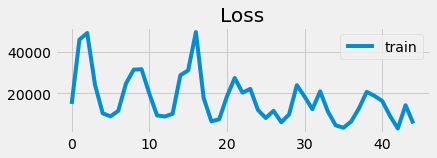

In [112]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
plt.legend()

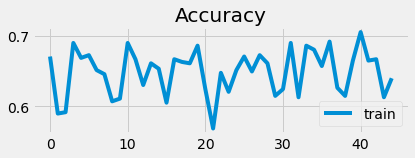

In [111]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
# plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### Random Forest

In [113]:
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit


In [114]:
tscv = TimeSeriesSplit(n_splits=3)

In [115]:
def _train_random_forest(X_train, y_train, X_test, y_test):

    """
    Function that uses random forest classifier to train the model
    :return:
    """
    
    # Create a new random forest classifier
    rf = RandomForestClassifier()
    
    # Dictionary of all values we want to test for n_estimators
    params_rf = {'n_estimators': [60,70,80,90,110,130,140,150,160,180,200]}
    
    # Use gridsearch to test all values for n_estimators
    rf_gs = GridSearchCV(rf, params_rf, cv=tscv, verbose =5)
    
    # Fit model to training data
    rf_gs.fit(X_train, y_train)
    
    # Save best model
    rf_best = rf_gs.best_estimator_
    
    # Check best n_estimators value
    print(rf_gs.best_params_)
    
    prediction = rf_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return rf_best
rf_model = _train_random_forest(X_train, y_train, X_test, y_test)    

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV 1/3] END ................................n_estimators=60; total time=   0.0s
[CV 2/3] END ................................n_estimators=60; total time=   0.0s
[CV 3/3] END ................................n_estimators=60; total time=   0.0s
[CV 1/3] END ................................n_estimators=70; total time=   0.0s
[CV 2/3] END ................................n_estimators=70; total time=   0.0s
[CV 3/3] END ................................n_estimators=70; total time=   0.0s
[CV 1/3] END ................................n_estimators=80; total time=   0.0s
[CV 2/3] END ................................n_estimators=80; total time=   0.0s
[CV 3/3] END ................................n_estimators=80; total time=   0.0s
[CV 1/3] END ................................n_estimators=90; total time=   0.0s
[CV 2/3] END ................................n_estimators=90; total time=   0.0s
[CV 3/3] END ................................n_e

C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [116]:
def _train_KNN(X_train, y_train, X_test, y_test):

    knn = KNeighborsClassifier()
    # Create a dictionary of all values we want to test for n_neighbors
    params_knn = {'n_neighbors': np.arange(1, 25)}
    
    # Use gridsearch to test all values for n_neighbors
    knn_gs = GridSearchCV(knn, params_knn, cv=tscv)
    
    # Fit model to training data
    knn_gs.fit(X_train, y_train)
    
    # Save best model
    knn_best = knn_gs.best_estimator_
     
    # Check best n_neigbors value
    print(knn_gs.best_params_)
    
    prediction = knn_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return knn_best
knn_model = _train_KNN(X_train, y_train, X_test, y_test)

{'n_neighbors': 4}
              precision    recall  f1-score   support

         0.0       0.46      1.00      0.63        80
         1.0       0.00      0.00      0.00        93

    accuracy                           0.46       173
   macro avg       0.23      0.50      0.32       173
weighted avg       0.21      0.46      0.29       173

[[80  0]
 [93  0]]


C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting Classifier

In [117]:
def _train_gbt(X_train, y_train, X_test, y_test):
    gbt = GradientBoostingClassifier()
    
    # Dictionary of all values we want to test for n_estimators
    params_gbt = {
    'learning_rate': [0.01, 0.1, 1.0],
    'n_estimators': [60,70,80,90,110,130,140,150,160,180,200]
}
    # Use gridsearch to test all values for all n estimators
    gbt_gs = GridSearchCV(gbt, params_gbt , cv=tscv)
    # Fit model to training data
    gbt_gs.fit(X_train, y_train)
    
    # Save best model
    gbt_best = gbt_gs.best_estimator_
     
    # Check best n_neigbors value
    print(gbt_gs.best_params_)
    
    prediction = gbt_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return gbt_best
gbt_model = _train_gbt(X_train, y_train, X_test, y_test)  

{'learning_rate': 1.0, 'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.43      0.85      0.57        80
         1.0       0.20      0.03      0.06        93

    accuracy                           0.41       173
   macro avg       0.32      0.44      0.31       173
weighted avg       0.31      0.41      0.29       173

[[68 12]
 [90  3]]


### SVM

In [118]:
def _train_svm(X_train, y_train, X_test, y_test):
    svm = SVC()
    
    # Dictionary of all values we want to test for n_estimators
    params_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
    # Use gridsearch to test all values for all n estimators
    svm_gs = GridSearchCV(svm, params_svm , cv=tscv, verbose=5)
    # Fit model to training data
    svm_gs.fit(X_train, y_train)
    
    # Save best model
    svm_best = svm_gs.best_estimator_
     
    # Check best n_neigbors value
    print(svm_gs.best_params_)
    
    prediction = svm_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return svm_best
svm_model = _train_svm(X_train, y_train, X_test, y_test) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/3] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/3] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/3] END .................C=0.1, gamma=0.001

C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Rescaling the Data

In [119]:
df

,High,Low,Open,Close,Volume,Adj Close,SMA,MACD,per_k_stoch_10,per_d_stoch_10,a/d,TP,Midband,Std,Upperband,Lowerband,OBV,pred
Date,,,,,,,,,,,,,,,,,,
2018-01-30,197.729996,194.889999,197.250000,196.899994,3343300,196.899994,192.032498,4.919007,35.359522,73.249568,1.133255e+07,196.506663,191.734333,7.268034,206.270401,177.198265,1404300.0,1.0
2018-01-31,200.960007,196.750000,197.130005,199.759995,2747600,199.759995,193.135498,4.864870,54.860417,69.574225,1.251381e+07,199.156667,192.846166,6.547660,205.941486,179.750847,595700.0,0.0
2018-02-01,201.750000,198.080002,199.119995,199.380005,2366100,199.380005,194.052499,4.736702,49.451718,65.732438,1.182397e+07,199.736669,193.822500,5.996959,205.816417,181.828583,381500.0,0.0
2018-02-02,199.399994,195.440002,197.330002,195.639999,2813800,195.639999,194.673499,4.283958,12.163523,58.639321,9.294387e+06,196.826665,194.515167,5.453302,205.421771,183.608562,447700.0,1.0
2018-02-05,198.460007,188.000000,194.059998,190.270004,3801300,190.270004,194.919999,3.452049,13.799421,50.276572,7.142984e+06,192.243337,194.881001,5.003034,204.887069,184.874932,987500.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,499.809998,490.570007,492.049988,495.959991,1369700,495.959991,493.352000,4.780439,26.217227,63.154669,1.872397e+08,495.446665,493.259168,11.662626,516.584419,469.933917,84200.0,0.0
2020-10-22,496.859985,479.399994,496.720001,483.600006,2613700,483.600006,494.148500,3.337236,10.447796,57.203113,1.858834e+08,486.619995,494.267334,9.972848,514.213031,474.321638,1244000.0,0.0
2020-10-23,488.510010,479.510010,486.410004,488.500000,1899300,488.500000,494.584500,2.559372,22.636841,49.470855,1.877785e+08,485.506673,494.753168,9.234697,513.222562,476.283774,714400.0,0.0


In [120]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'SMA', 'MACD',
       'per_k_stoch_10', 'per_d_stoch_10', 'a/d', 'TP', 'Midband', 'Std',
       'Upperband', 'Lowerband', 'OBV', 'pred'],
      dtype='object')

In [121]:
X = df[['Volume',  'SMA', 'MACD',
       'per_k_stoch_10', 'per_d_stoch_10', 'a/d', 'TP', 'Midband', 'Std',
       'Upperband', 'Lowerband', 'OBV']]

In [122]:
y = df['pred']

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

### Random Forest

In [125]:
def _train_random_forest(X_train, y_train, X_test, y_test):

    """
    Function that uses random forest classifier to train the model
    :return:
    """
    
    # Create a new random forest classifier
    rf = RandomForestClassifier()
    
    # Dictionary of all values we want to test for n_estimators
    params_rf = {'n_estimators': [60,70,80,90,110,130,140,150,160,180,200]}
    
    # Use gridsearch to test all values for n_estimators
    rf_gs = GridSearchCV(rf, params_rf, cv=tscv, verbose =5)
    
    # Fit model to training data
    rf_gs.fit(X_train, y_train)
    
    # Save best model
    rf_best = rf_gs.best_estimator_
    
    # Check best n_estimators value
    print(rf_gs.best_params_)
    
    prediction = rf_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return rf_best
rf_model = _train_random_forest(X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV 1/3] END ................................n_estimators=60; total time=   0.0s
[CV 2/3] END ................................n_estimators=60; total time=   0.0s
[CV 3/3] END ................................n_estimators=60; total time=   0.0s
[CV 1/3] END ................................n_estimators=70; total time=   0.0s
[CV 2/3] END ................................n_estimators=70; total time=   0.0s
[CV 3/3] END ................................n_estimators=70; total time=   0.0s
[CV 1/3] END ................................n_estimators=80; total time=   0.0s
[CV 2/3] END ................................n_estimators=80; total time=   0.0s
[CV 3/3] END ................................n_estimators=80; total time=   0.0s
[CV 1/3] END ................................n_estimators=90; total time=   0.0s
[CV 2/3] END ................................n_estimators=90; total time=   0.0s
[CV 3/3] END ................................n_e

C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [126]:
def _train_KNN(X_train, y_train, X_test, y_test):

    knn = KNeighborsClassifier()
    # Create a dictionary of all values we want to test for n_neighbors
    params_knn = {'n_neighbors': np.arange(1, 25)}
    
    # Use gridsearch to test all values for n_neighbors
    knn_gs = GridSearchCV(knn, params_knn, cv=tscv)
    
    # Fit model to training data
    knn_gs.fit(X_train, y_train)
    
    # Save best model
    knn_best = knn_gs.best_estimator_
     
    # Check best n_neigbors value
    print(knn_gs.best_params_)
    
    prediction = knn_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return knn_best
knn_model = _train_KNN(X_train, y_train, X_test, y_test)

{'n_neighbors': 18}
              precision    recall  f1-score   support

         0.0       0.48      1.00      0.65        80
         1.0       1.00      0.08      0.14        93

    accuracy                           0.50       173
   macro avg       0.74      0.54      0.40       173
weighted avg       0.76      0.50      0.38       173

[[80  0]
 [86  7]]


### Gradient Boosting Classifier

In [127]:
def _train_gbt(X_train, y_train, X_test, y_test):
    gbt = GradientBoostingClassifier()
    
    # Dictionary of all values we want to test for n_estimators
    params_gbt = {
    'learning_rate': [0.01, 0.1, 1.0],
    'n_estimators': [60,70,80,90,110,130,140,150,160,180,200]
}
    # Use gridsearch to test all values for all n estimators
    gbt_gs = GridSearchCV(gbt, params_gbt , cv=tscv)
    # Fit model to training data
    gbt_gs.fit(X_train, y_train)
    
    # Save best model
    gbt_best = gbt_gs.best_estimator_
     
    # Check best n_neigbors value
    print(gbt_gs.best_params_)
    
    prediction = gbt_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return gbt_best
gbt_model = _train_gbt(X_train, y_train, X_test, y_test)  

{'learning_rate': 1.0, 'n_estimators': 180}
              precision    recall  f1-score   support

         0.0       0.46      0.97      0.62        80
         1.0       0.00      0.00      0.00        93

    accuracy                           0.45       173
   macro avg       0.23      0.49      0.31       173
weighted avg       0.21      0.45      0.29       173

[[78  2]
 [93  0]]


### SVM

In [128]:
def _train_svm(X_train, y_train, X_test, y_test):
    svm = SVC()
    
    # Dictionary of all values we want to test for n_estimators
    params_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
    # Use gridsearch to test all values for all n estimators
    svm_gs = GridSearchCV(svm, params_svm , cv=tscv, verbose=5)
    # Fit model to training data
    svm_gs.fit(X_train, y_train)
    
    # Save best model
    svm_best = svm_gs.best_estimator_
     
    # Check best n_neigbors value
    print(svm_gs.best_params_)
    
    prediction = svm_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return svm_best
svm_model = _train_svm(X_train, y_train, X_test, y_test) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/3] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/3] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/3] END .................C=0.1, gamma=0.001

### Dimensionality Reduction

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

### KNN

In [130]:
def _train_KNN(X, y):
    pca = PCA()
    knn = KNeighborsClassifier()
    pipe = Pipeline(steps=[('pca', pca), ('knn', knn)])
    
    param_grid = {
        'knn__n_neighbors': np.arange(1, 25),
        'pca__n_components': [5, 6, 7, 8, 9,10]}
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=tscv, verbose=5)
    search.fit(X, y)
    
    
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
knn_model = _train_KNN(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameter (CV score=0.767):
{'knn__n_neighbors': 9, 'pca__n_components': 6}


### Random Forest

In [131]:
def _train_random_forest(X, y):
    pca = PCA()
    rf = RandomForestClassifier()
    
    pipe = Pipeline(steps=[('pca', pca), ('rf', rf)])
    param_grid = {
        'rf__n_estimators': [60,70,80,90,110,130,140,150,160,180,200],
        'pca__n_components': [5, 6, 7, 8, 9,10]}
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=tscv, verbose=5)
    search.fit(X, y)
    
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
rf_model = _train_random_forest(X_train, y_train)

Fitting 3 folds for each of 66 candidates, totalling 198 fits
Best parameter (CV score=0.809):
{'pca__n_components': 9, 'rf__n_estimators': 60}


### Gradient Boosting Classifier

In [132]:
def _train_gbt(X, y):
    pca = PCA()
    gbt = GradientBoostingClassifier()
    
    pipe = Pipeline(steps=[('pca', pca), ('gbt', gbt)])
    param_grid = {
        'gbt__learning_rate': [0.01, 0.1, 1.0],
        'gbt__n_estimators': [60,70,80,90,110,130,140,150,160,180,200],
        'pca__n_components': [ 8, 9,10,11,12,13,14,15]}
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=tscv, verbose=10)
    search.fit(X, y)
    
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
gbt_model = _train_gbt(X_train, y_train)

Fitting 3 folds for each of 264 candidates, totalling 792 fits
Best parameter (CV score=0.837):
{'gbt__learning_rate': 1.0, 'gbt__n_estimators': 90, 'pca__n_components': 8}


C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.75452196 0.75193798 0.75193798 0.75193798 0.75452196        nan
        nan        nan 0.75193798 0.75193798 0.75193798 0.75193798
 0.75193798        nan        nan        nan 0.75193798 0.75710594
 0.74935401 0.74935401 0.75193798        nan        nan        nan
 0.75193798 0.75452196 0.75710594 0.74935401 0.75193798        nan
        nan        nan 0.75193798 0.75452196 0.75193798 0.74418605
 0.74935401        nan        nan        nan 0.76485788 0.75968992
 0.7622739  0.75452196 0.75968992        nan        nan        nan
 0.76485788 0.77002584 0.7622739  0.77002584 0.76744186        nan
        nan        nan 0.77777778 0.77002584 0.77777778 0.77002584
 0.77002584        nan        nan        nan 0.77002584 0.77260982
 0.76744186 0.77260982 0.77777778        nan        nan        nan
 0.77260982 0.79328165 0.7881137  0.780361

### SVM

In [133]:
def _train_svm(X, y):
    pca = PCA()
    svm = SVC()
    
    pipe = Pipeline(steps=[('pca', pca), ('svm', svm)])
    param_grid = {
        'svm__C': [0.1, 1, 10, 100, 1000], 
                  'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                   'svm__kernel': ['rbf'],
        'pca__n_components': [ 8, 9,10,11,12,13,14,15]}
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=tscv, verbose=10)
    search.fit(X, y)
    
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
svm_model = _train_svm(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best parameter (CV score=0.783):
{'pca__n_components': 9, 'svm__C': 1000, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}


C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.74677003 0.74677003 0.74677003 0.74677003 0.74677003 0.75452196
 0.74677003 0.74677003 0.74677003 0.74677003 0.77002584 0.75710594
 0.74677003 0.74677003 0.74677003 0.77260982 0.78036176 0.74935401
 0.74677003 0.74677003 0.74418605 0.76485788 0.7751938  0.74935401
 0.74677003 0.74677003 0.74677003 0.74677003 0.74677003 0.74677003
 0.75452196 0.74677003 0.74677003 0.74677003 0.74677003 0.77260982
 0.75710594 0.74677003 0.74677003 0.74677003 0.77002584 0.78036176
 0.74935401 0.74677003 0.74677003 0.75452196 0.78294574 0.7751938
 0.74935401 0.74677003 0.74677003 0.74677003 0.74677003 0.74677003
 0.74677003 0.75452196 0.74677003 0.74677003 0.74677003 0.74677003
 0.77260982 0.75710594 0.74677003 0.74677003 0.74677003 0.77002584
 0.78036176 0.74935401 0.74677003 0.74677003 0.75452196 0.78294574
 0.7751938  0.74935401 0.74677003 0.7467700

## Dimensionality Reduction on Unscaled Data

In [134]:
df

,High,Low,Open,Close,Volume,Adj Close,SMA,MACD,per_k_stoch_10,per_d_stoch_10,a/d,TP,Midband,Std,Upperband,Lowerband,OBV,pred
Date,,,,,,,,,,,,,,,,,,
2018-01-30,197.729996,194.889999,197.250000,196.899994,3343300,196.899994,192.032498,4.919007,35.359522,73.249568,1.133255e+07,196.506663,191.734333,7.268034,206.270401,177.198265,1404300.0,1.0
2018-01-31,200.960007,196.750000,197.130005,199.759995,2747600,199.759995,193.135498,4.864870,54.860417,69.574225,1.251381e+07,199.156667,192.846166,6.547660,205.941486,179.750847,595700.0,0.0
2018-02-01,201.750000,198.080002,199.119995,199.380005,2366100,199.380005,194.052499,4.736702,49.451718,65.732438,1.182397e+07,199.736669,193.822500,5.996959,205.816417,181.828583,381500.0,0.0
2018-02-02,199.399994,195.440002,197.330002,195.639999,2813800,195.639999,194.673499,4.283958,12.163523,58.639321,9.294387e+06,196.826665,194.515167,5.453302,205.421771,183.608562,447700.0,1.0
2018-02-05,198.460007,188.000000,194.059998,190.270004,3801300,190.270004,194.919999,3.452049,13.799421,50.276572,7.142984e+06,192.243337,194.881001,5.003034,204.887069,184.874932,987500.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,499.809998,490.570007,492.049988,495.959991,1369700,495.959991,493.352000,4.780439,26.217227,63.154669,1.872397e+08,495.446665,493.259168,11.662626,516.584419,469.933917,84200.0,0.0
2020-10-22,496.859985,479.399994,496.720001,483.600006,2613700,483.600006,494.148500,3.337236,10.447796,57.203113,1.858834e+08,486.619995,494.267334,9.972848,514.213031,474.321638,1244000.0,0.0
2020-10-23,488.510010,479.510010,486.410004,488.500000,1899300,488.500000,494.584500,2.559372,22.636841,49.470855,1.877785e+08,485.506673,494.753168,9.234697,513.222562,476.283774,714400.0,0.0


In [135]:
X = df[['Volume',  'SMA', 'MACD',
       'per_k_stoch_10', 'per_d_stoch_10', 'a/d', 'TP', 'Midband', 'Std',
       'Upperband', 'Lowerband', 'OBV']]

In [136]:
y = df['pred']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 7 * len(X) // 10,shuffle=False)


In [138]:
def _train_KNN(X, y):
    pca = PCA()
    knn = KNeighborsClassifier()
    pipe = Pipeline(steps=[('pca', pca), ('knn', knn)])
    
    param_grid = {
        'knn__n_neighbors': np.arange(1, 25),
        'pca__n_components': [5, 6, 7, 8, 9,10]}
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=tscv, verbose=5)
    search.fit(X, y)
    
    
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
knn_model = _train_KNN(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameter (CV score=0.725):
{'knn__n_neighbors': 2, 'pca__n_components': 5}


In [139]:
def _train_random_forest(X, y):
    pca = PCA()
    rf = RandomForestClassifier()
    
    pipe = Pipeline(steps=[('pca', pca), ('rf', rf)])
    param_grid = {
        'rf__n_estimators': [60,70,80,90,110,130,140,150,160,180,200],
        'pca__n_components': [5, 6, 7, 8, 9,10]}
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=tscv, verbose=5)
    search.fit(X, y)
    
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
rf_model = _train_random_forest(X_train, y_train)

Fitting 3 folds for each of 66 candidates, totalling 198 fits
Best parameter (CV score=0.738):
{'pca__n_components': 7, 'rf__n_estimators': 70}


In [140]:
def _train_gbt(X, y):
    pca = PCA()
    gbt = GradientBoostingClassifier()
    
    pipe = Pipeline(steps=[('pca', pca), ('gbt', gbt)])
    param_grid = {
        'gbt__learning_rate': [0.01, 0.1, 1.0],
        'gbt__n_estimators': [60,70,80,90,110,130,140,150,160,180,200],
        'pca__n_components': [ 8, 9,10,11,12,13,14,15]}
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=tscv, verbose=10)
    search.fit(X, y)
    
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
gbt_model = _train_gbt(X_train, y_train)

Fitting 3 folds for each of 264 candidates, totalling 792 fits
Best parameter (CV score=0.738):
{'gbt__learning_rate': 0.01, 'gbt__n_estimators': 160, 'pca__n_components': 9}


C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.72176309 0.72451791 0.72451791 0.72451791 0.72451791        nan
        nan        nan 0.72176309 0.72451791 0.72451791 0.72451791
 0.72451791        nan        nan        nan 0.72176309 0.72451791
 0.72451791 0.72451791 0.72451791        nan        nan        nan
 0.72176309 0.72451791 0.72451791 0.72451791 0.72451791        nan
        nan        nan 0.72176309 0.73002755 0.72451791 0.72451791
 0.72451791        nan        nan        nan 0.7107438  0.73553719
 0.73002755 0.73002755 0.73002755        nan        nan        nan
 0.70798898 0.73553719 0.73002755 0.73002755 0.73002755        nan
        nan        nan 0.70798898 0.73553719 0.73002755 0.73002755
 0.73278237        nan        nan        nan 0.70798898 0.73829201
 0.73278237 0.73553719 0.73553719        nan        nan        nan
 0.70523416 0.72727273 0.73002755 0.730027

In [141]:
def _train_svm(X, y):
    pca = PCA()
    svm = SVC()
    
    pipe = Pipeline(steps=[('pca', pca), ('svm', svm)])
    param_grid = {
        'svm__C': [0.1, 1, 10, 100, 1000], 
                  'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                   'svm__kernel': ['rbf'],
        'pca__n_components': [ 8, 9,10,11,12,13,14,15]}
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=tscv, verbose=10)
    search.fit(X, y)
    
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
svm_model = _train_svm(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best parameter (CV score=0.725):
{'pca__n_components': 8, 'svm__C': 0.1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}


C:\Users\adhar\anaconda3\envs\tfgpu\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.72451791 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791
 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791
 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791
 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791
 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791
 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791
 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791
 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791
 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791
 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791
 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791
 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791 0.72451791
 0.72451791 0.72451791 0.72451791 0.724517

In [142]:
df

,High,Low,Open,Close,Volume,Adj Close,SMA,MACD,per_k_stoch_10,per_d_stoch_10,a/d,TP,Midband,Std,Upperband,Lowerband,OBV,pred
Date,,,,,,,,,,,,,,,,,,
2018-01-30,197.729996,194.889999,197.250000,196.899994,3343300,196.899994,192.032498,4.919007,35.359522,73.249568,1.133255e+07,196.506663,191.734333,7.268034,206.270401,177.198265,1404300.0,1.0
2018-01-31,200.960007,196.750000,197.130005,199.759995,2747600,199.759995,193.135498,4.864870,54.860417,69.574225,1.251381e+07,199.156667,192.846166,6.547660,205.941486,179.750847,595700.0,0.0
2018-02-01,201.750000,198.080002,199.119995,199.380005,2366100,199.380005,194.052499,4.736702,49.451718,65.732438,1.182397e+07,199.736669,193.822500,5.996959,205.816417,181.828583,381500.0,0.0
2018-02-02,199.399994,195.440002,197.330002,195.639999,2813800,195.639999,194.673499,4.283958,12.163523,58.639321,9.294387e+06,196.826665,194.515167,5.453302,205.421771,183.608562,447700.0,1.0
2018-02-05,198.460007,188.000000,194.059998,190.270004,3801300,190.270004,194.919999,3.452049,13.799421,50.276572,7.142984e+06,192.243337,194.881001,5.003034,204.887069,184.874932,987500.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,499.809998,490.570007,492.049988,495.959991,1369700,495.959991,493.352000,4.780439,26.217227,63.154669,1.872397e+08,495.446665,493.259168,11.662626,516.584419,469.933917,84200.0,0.0
2020-10-22,496.859985,479.399994,496.720001,483.600006,2613700,483.600006,494.148500,3.337236,10.447796,57.203113,1.858834e+08,486.619995,494.267334,9.972848,514.213031,474.321638,1244000.0,0.0
2020-10-23,488.510010,479.510010,486.410004,488.500000,1899300,488.500000,494.584500,2.559372,22.636841,49.470855,1.877785e+08,485.506673,494.753168,9.234697,513.222562,476.283774,714400.0,0.0


In [143]:
df['pred'].value_counts()

0.0    461
1.0    231
Name: pred, dtype: int64